# Asymmetric transit model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import lightkurve as lk

## Read K1255 lightcurve

In [3]:
k1255_df = pd.read_csv('k1255_lc.dat', delim_whitespace=True, header=None,
                       names=['t', 'flux', 'flux_err'])

In [4]:
k1255_lc = lk.LightCurve(time=k1255_df.t, flux=k1255_df.flux, flux_err=k1255_df.flux_err).remove_outliers()

In [5]:
k1255_lc_binned = k1255_lc.bin(binsize=60)

In [6]:
k1255_lc_short = k1255_lc[:30000]

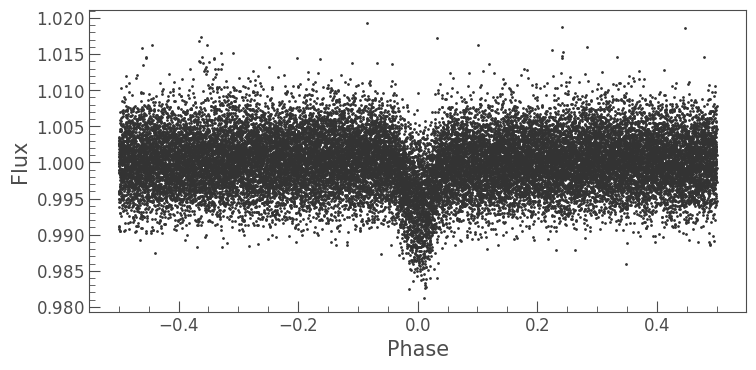

In [7]:
k1255_lc_folded = k1255_lc_short.fold(period=15.685/24.0, t0=1182.97)
ax = k1255_lc_folded.scatter()

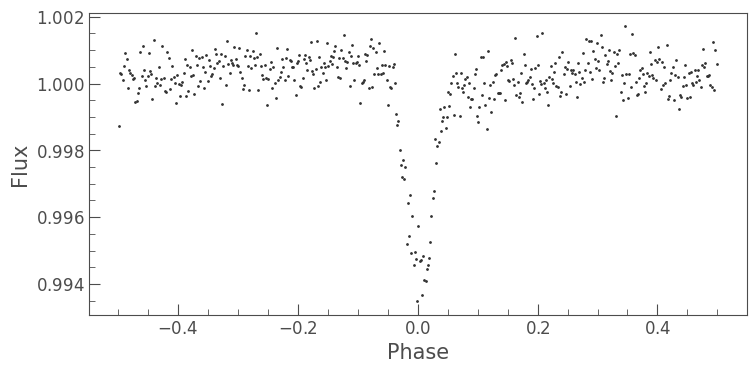

In [8]:
median_lc = k1255_lc_folded.bin(60)
median_lc.scatter()

## Find individual transits approximately

In [9]:
def asymmetric_transit(times, t0=0.0, depth=0.006,
                       pre_dur=0.04, pre_exp=0.5,
                       post_dur=0.04, post_exp=0.5):
    flux = np.ones_like(times)
    pre_transit = (times > (t0 - pre_dur)) & (times < t0)
    flux[pre_transit] += (depth * pow(-(times[pre_transit] - t0)/pre_dur, pre_exp) - depth)
    post_transit = (times > t0) & (times < (t0 + post_dur))
    flux[post_transit] += (depth * pow((times[post_transit] - t0)/post_dur, post_exp) - depth)
    return flux

In [10]:
from ipywidgets import interactive, widgets

In [11]:
def plot_with_model(t0=0.0, depth=0.006, pre_dur=0.04, pre_exp=0.5,
                    post_dur=0.04,post_exp=0.5):
    transit_model = asymmetric_transit(median_lc.time, t0=t0, depth=depth,
                                       pre_dur=pre_dur, pre_exp=pre_exp,
                                       post_dur=post_dur, post_exp=post_exp)
    ax = median_lc.scatter()
    ax.plot(median_lc.time.value, transit_model, 'r-')
    ax.set_xlim(-0.15, 0.15)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='t0', max=0.1, min=-0.1, readout_format='.3f', step=0…

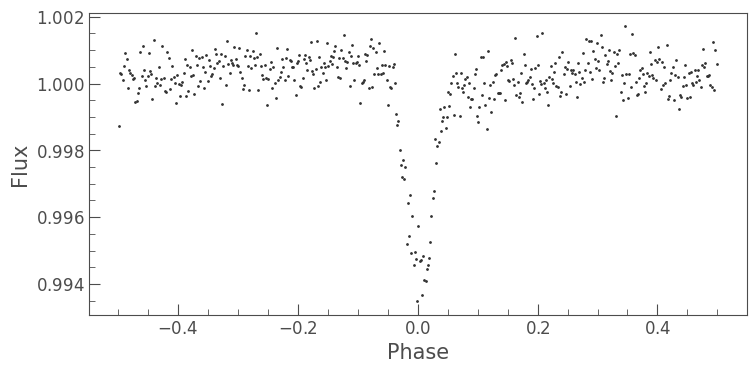

In [12]:
t0_widget = widgets.FloatSlider(min=-0.1, max=0.1, step=0.001, value=0.0,
                                readout_format='.3f')
depth_widget = widgets.FloatSlider(min=0.0, max=0.01, step=0.001, value=0.006,
                                   readout_format='.3f')
pre_dur_widget=widgets.FloatSlider(min=0.0, max=0.1, step=0.005, value=0.04, readout_format='.3f')
post_dur_widget=widgets.FloatSlider(min=0.0, max=0.1, step=0.005, value=0.04, readout_format='.3f')

interactive_plot = interactive(plot_with_model,
                               t0=t0_widget,
                               depth=depth_widget,
                               pre_dur=pre_dur_widget,
                               post_dur=post_dur_widget,
                               pre_exp=(0.0, 1.0, 0.05),
                               post_exp=(0.0, 1.0, 0.05))
output = interactive_plot.children[-2:]
interactive_plot